In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
plt.rc('font', size=26)          # text size
plt.rc('axes', titlesize=26)     # axes title size
plt.rc('axes', labelsize=26)     # axes label size
plt.rc('xtick', labelsize=22)    # x-tick label size
plt.rc('ytick', labelsize=22)    # y-tick label size
plt.rc('legend', fontsize=24)    # legend font size
plt.rc('figure', titlesize=30)   # figure title size

In [3]:
data_headers = []

def extract_data(folder): # get data
    data_dict = {} 
    
    for filename in os.listdir(folder):
        if filename.endswith('.TXT'):
            file_path = os.path.join(folder, filename)
            #print(filename)
            
            try:
                data = np.genfromtxt(file_path, delimiter=',', skip_header=3, usecols=(0, 1), skip_footer=1)
                data = data[~np.isnan(data).any(axis=1)]
                
                file_key = os.path.splitext(filename)[0]
                #print(file_key)
                
                freq_var = f'{file_key}_freq_data'
                amp_var = f'{file_key}_amp_data'
                
                data_headers.append(file_key)
                
                freq_data = data[:, 0]
                amp_data = data[:, 1]
                
                data_dict[freq_var] = freq_data
                data_dict[amp_var] = amp_data
                
                
            except Exception as e:
                print(f'Error reading {filename}: {e}')
                
    return data_dict

In [4]:
folder = 'Data/4d/AD797/'

data = extract_data(folder)

data_headers

['AD797_12point5khz_4res_200avg',
 'AD797_190hz_1res_75avg',
 'AD797_1point56khz_4res_100avg',
 'AD797_28point8khz_4res_200avg',
 'AD797_392hz_1res_75avg',
 'AD797_781point5hz_2res_100avg']

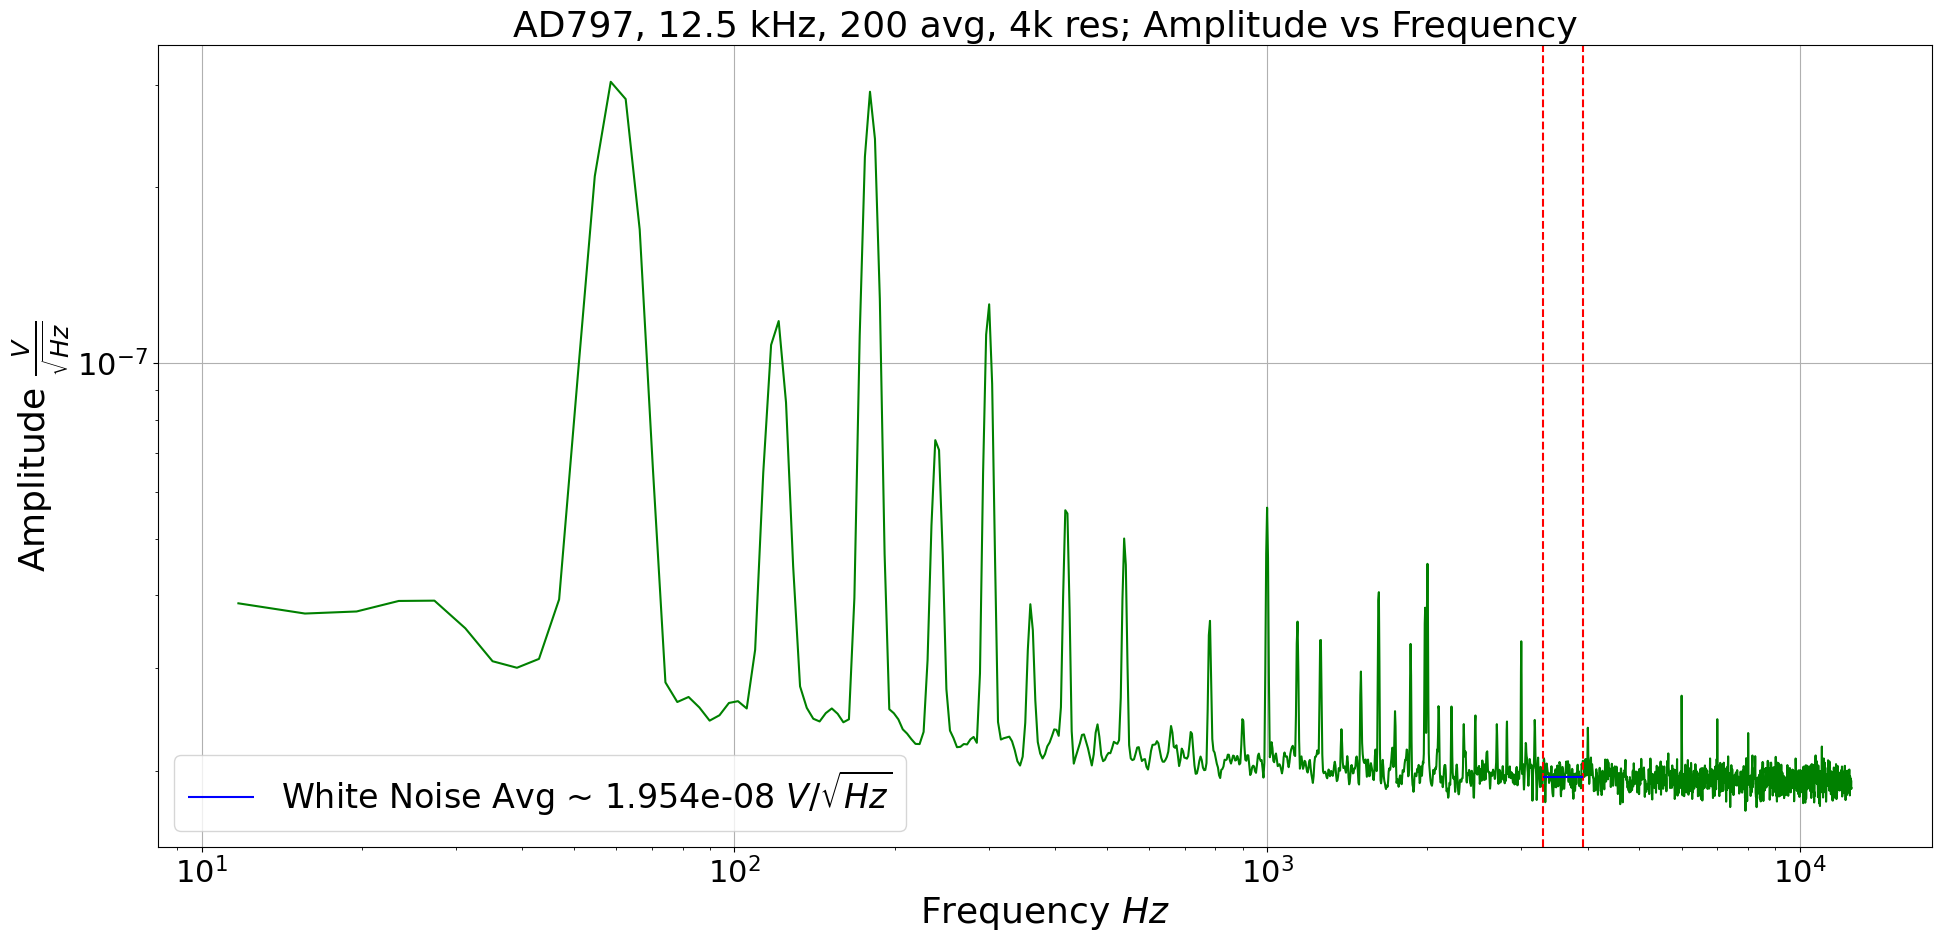

White noise average across 160 bins: 1.9544999450921242e-08


In [5]:
skip = 3
data_header = data_headers[0] 
#title = data_header
title = 'AD797, 12.5 kHz, 200 avg, 4k res'

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        amp_key = f'{base_name}_amp_data'

        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            amp_data = data[amp_key]
            
            cut_freq_data = freq_data[skip:]
            cut_amp_data = amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 840
            white_noise_index2 = 1000
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise = np.mean(cut_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'freq_data': cut_freq_data,
                'amp_data': cut_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise': white_noise
            })

plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['amp_data'], color='green')#, label=f'gain')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--')#, label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--')#, label=f"f2: {white_noise_freq2}")
plt.hlines(y=white_noise, xmin=white_noise_freq1, xmax=white_noise_freq2, 
           color='blue', linestyle='-', label=f'White Noise Avg ~ {white_noise:.3e} ' r'$V/\sqrt{Hz}$')
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend(loc='lower left')

output_path = f'Plots/4d-AD797_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f'White noise average across {white_noise_index2 - white_noise_index1} bins: {white_noise}')

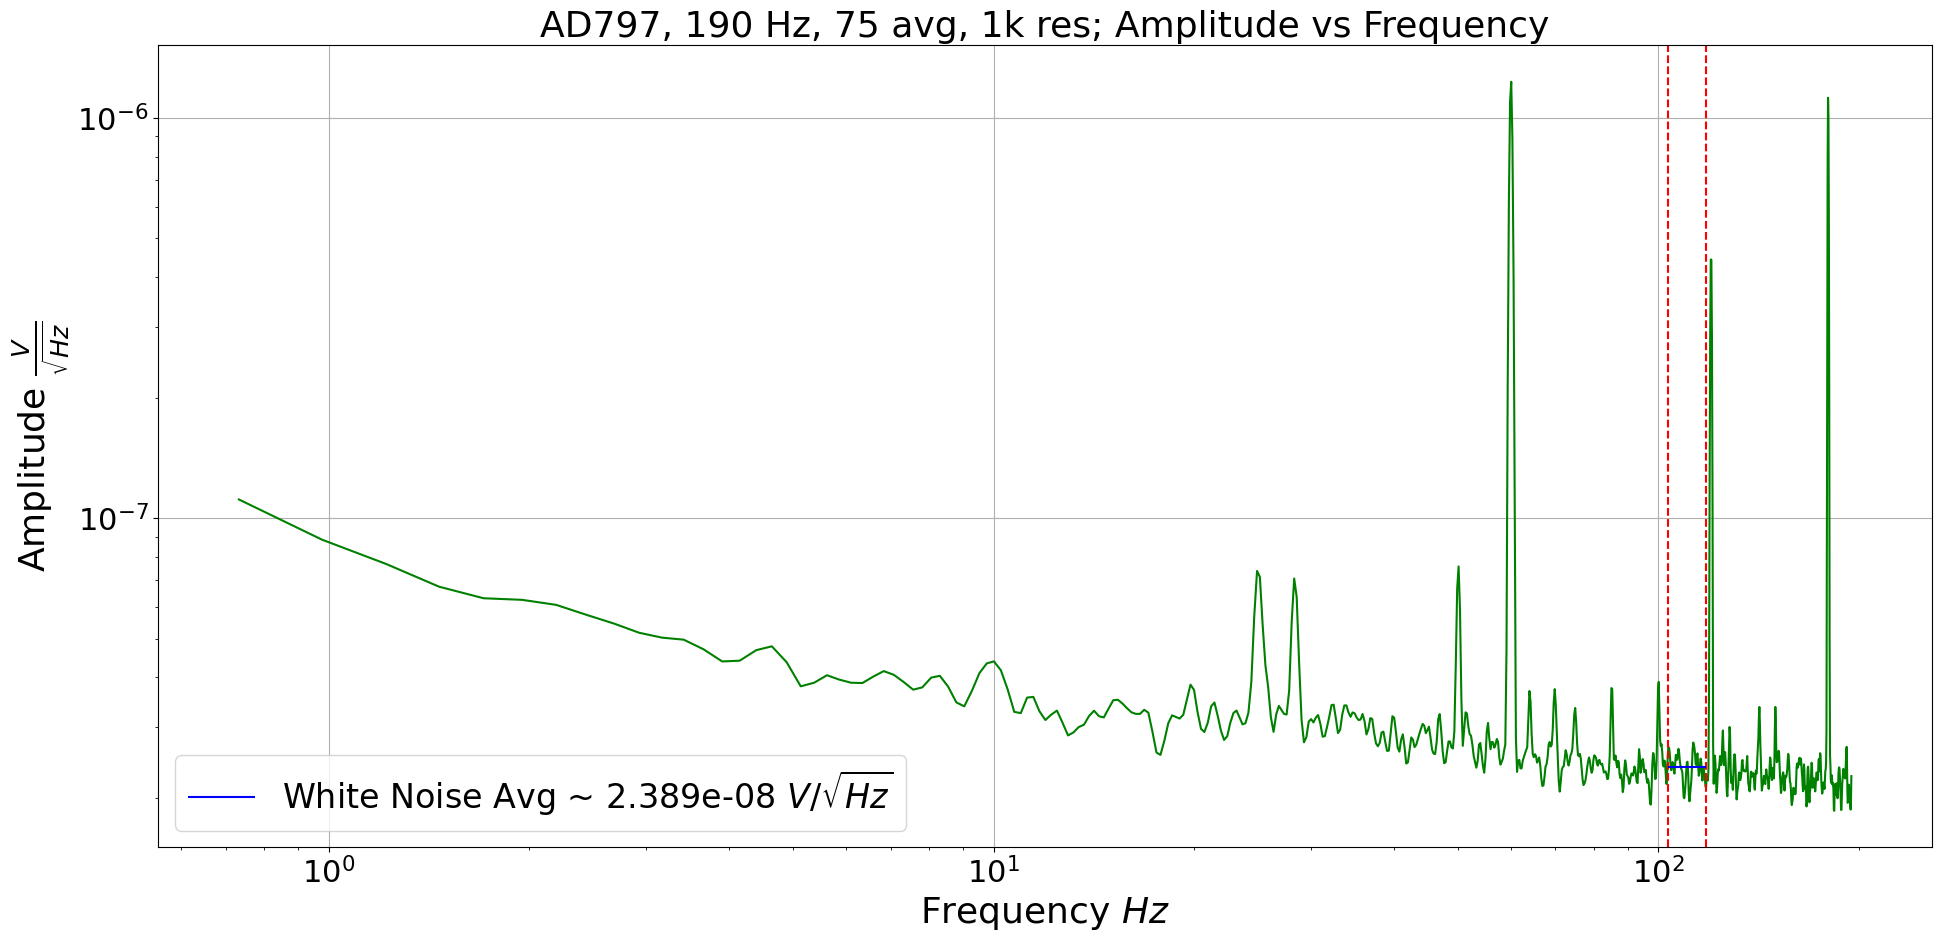

White noise average across 60 bins: 2.3886946040369104e-08


In [6]:
skip = 3
data_header = data_headers[1] 
#title = data_header
title = 'AD797, 190 Hz, 75 avg, 1k res'

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        amp_key = f'{base_name}_amp_data'

        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            amp_data = data[amp_key]

            cut_freq_data = freq_data[skip:]
            cut_amp_data = amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 420
            white_noise_index2 = 480
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise = np.mean(cut_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'freq_data': cut_freq_data,
                'amp_data': cut_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise': white_noise
            })

plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['amp_data'], color='green')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--')#label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--')# label=f"f2: {white_noise_freq2}")
plt.hlines(y=white_noise, xmin=white_noise_freq1, xmax=white_noise_freq2, 
           color='blue', linestyle='-', label=f'White Noise Avg ~ {white_noise:.3e} ' r'$V/\sqrt{Hz}$')
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend(loc='lower left')

output_path = f'Plots/4d-AD797_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f'White noise average across {white_noise_index2 - white_noise_index1} bins: {white_noise}')

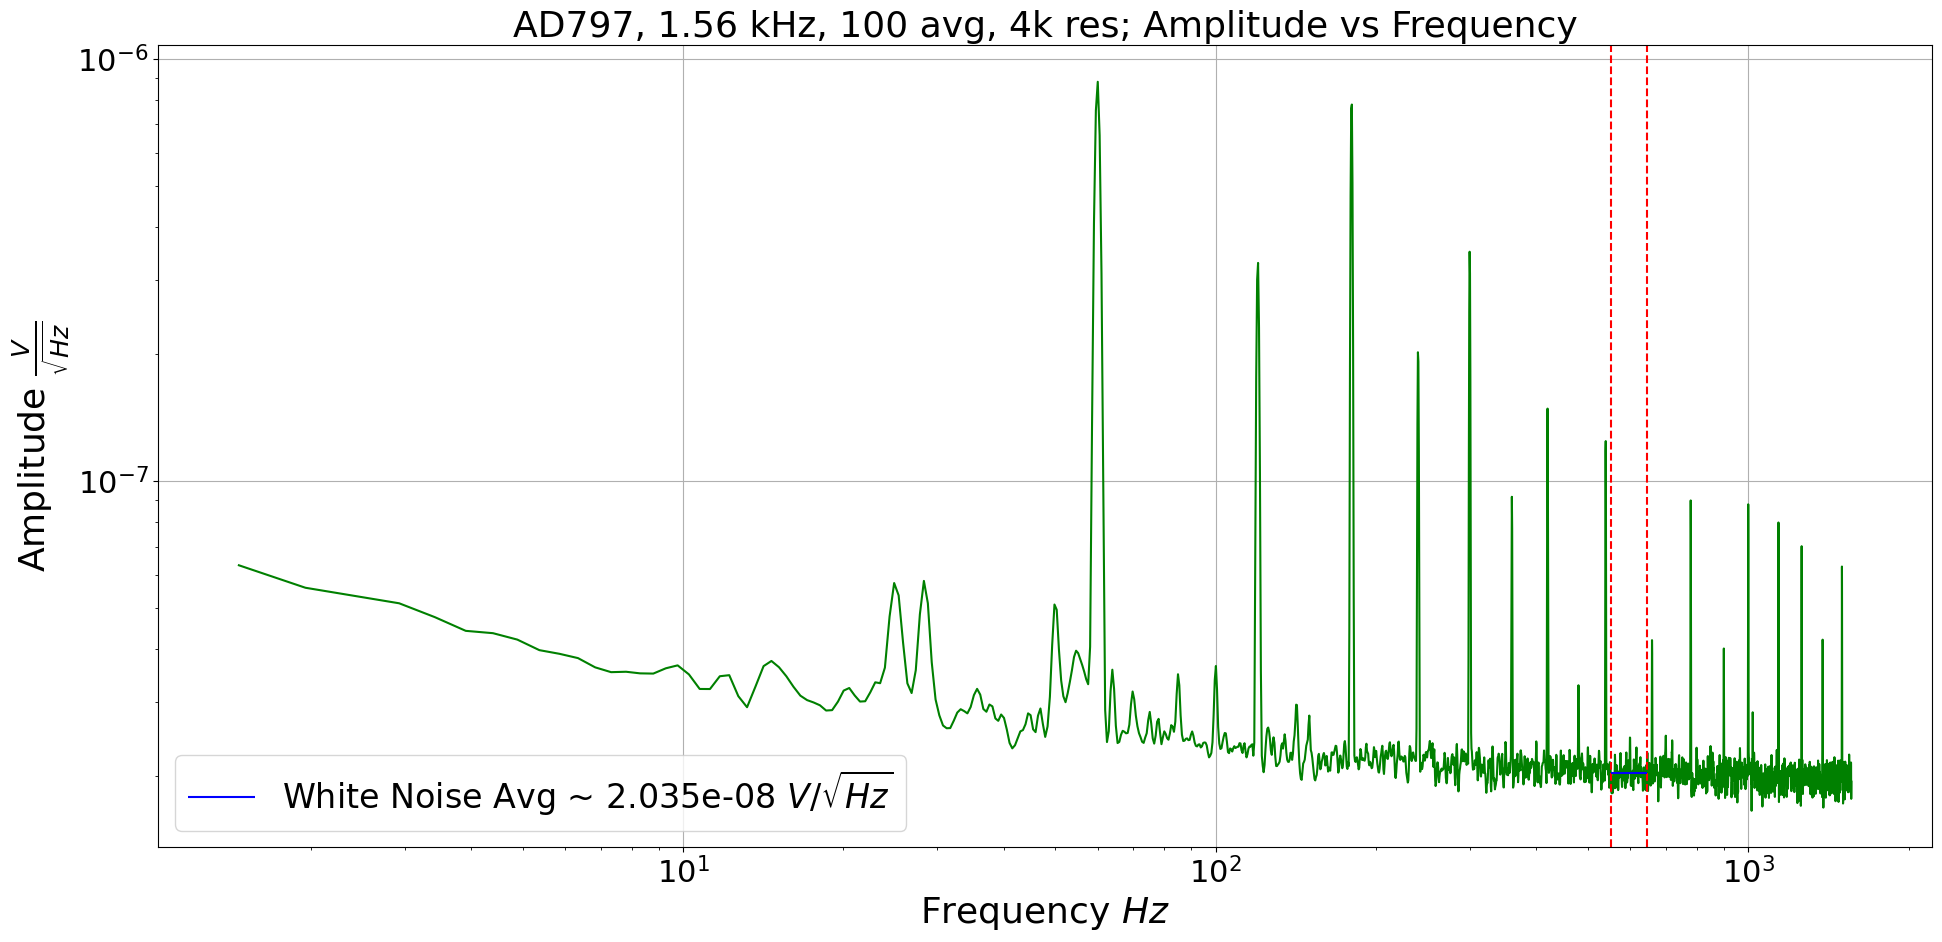

White noise average across 190 bins: 2.035407644292378e-08


In [7]:
skip = 3
data_header = data_headers[2] 
#title = data_header
title = f'AD797, 1.56 kHz, 100 avg, 4k res'

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        amp_key = f'{base_name}_amp_data'

        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            amp_data = data[amp_key]

            cut_freq_data = freq_data[skip:]
            cut_amp_data = amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 1130
            white_noise_index2 = 1320
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise = np.mean(cut_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'freq_data': cut_freq_data,
                'amp_data': cut_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise': white_noise
            })


plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['amp_data'], color='green')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--')#, label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--')#, label=f"f2: {white_noise_freq2}")
plt.hlines(y=white_noise, xmin=white_noise_freq1, xmax=white_noise_freq2, 
           color='blue', linestyle='-', label=f'White Noise Avg ~ {white_noise:.3e} ' r'$V/\sqrt{Hz}$')
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend(loc='lower left')

output_path = f'Plots/4d-AD797_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f'White noise average across {white_noise_index2 - white_noise_index1} bins: {white_noise}')

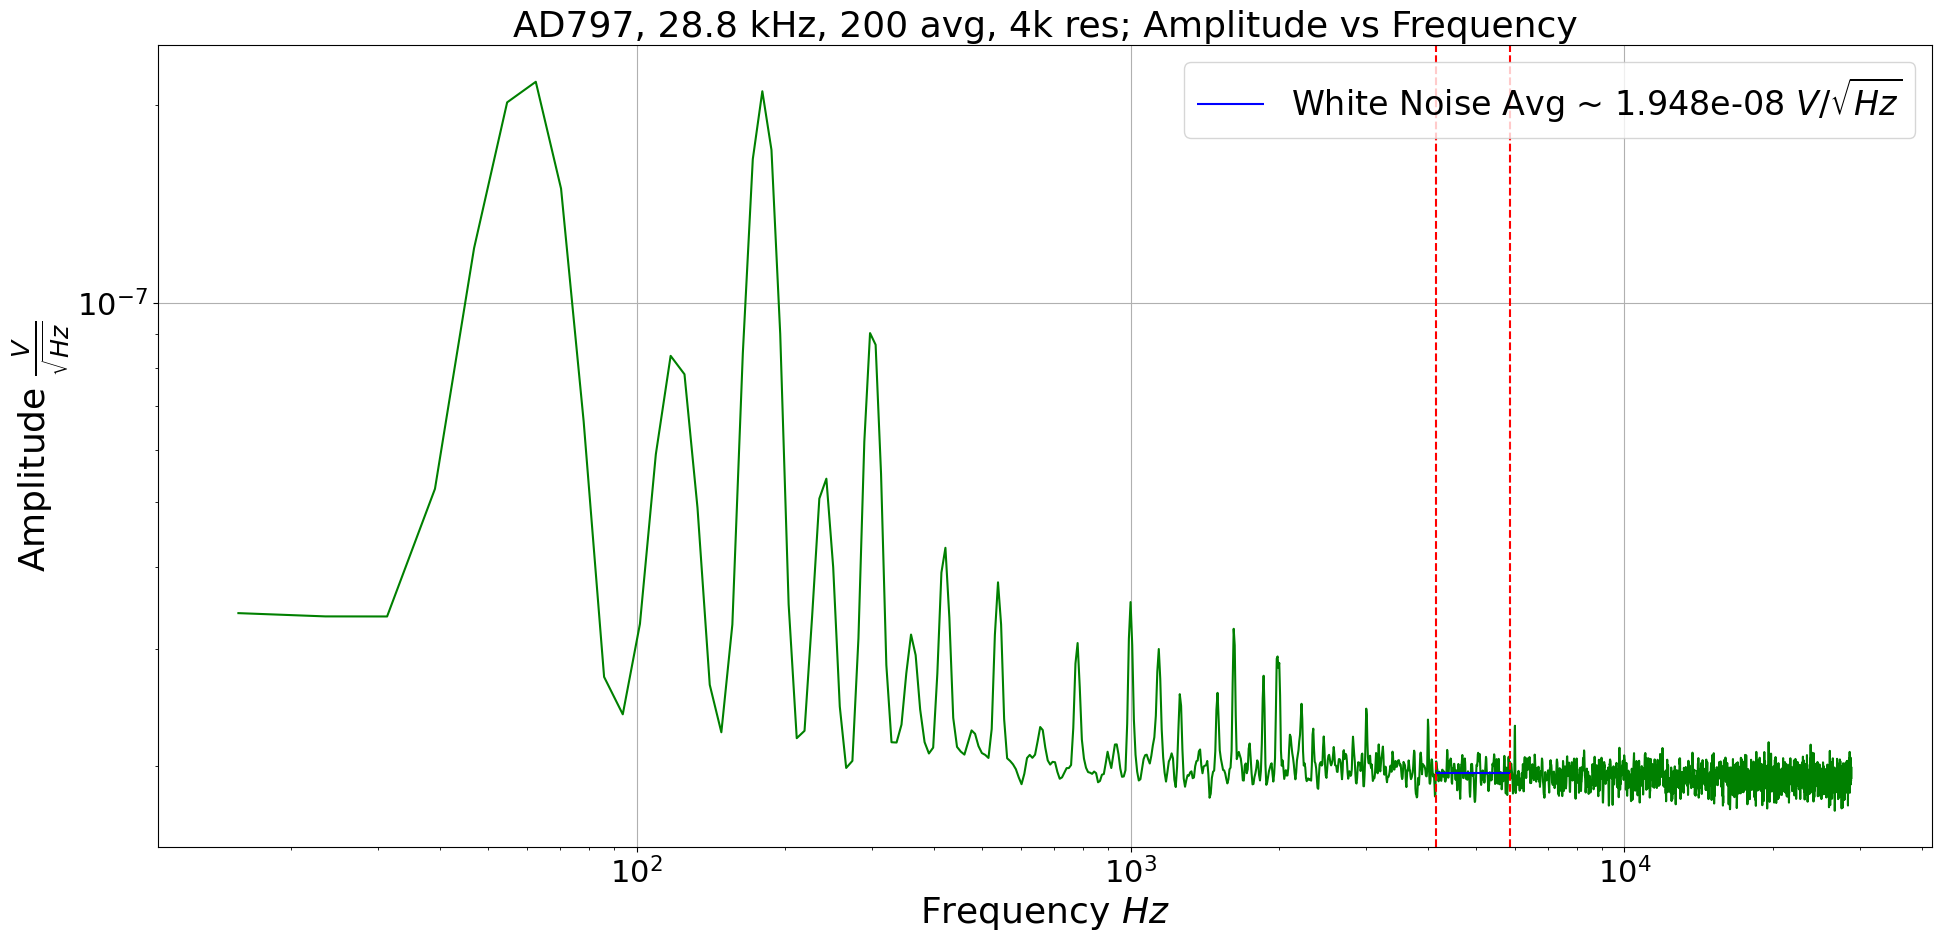

White noise average across 220 bins: 1.9476864633612507e-08


In [66]:
skip = 3
data_header = data_headers[3] 
#title = data_header
title = f'AD797, 28.8 kHz, 200 avg, 4k res'

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        amp_key = f'{base_name}_amp_data'

        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            amp_data = data[amp_key]

            cut_freq_data = freq_data[skip:]
            cut_amp_data = amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 530
            white_noise_index2 = 750
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise = np.mean(cut_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'freq_data': cut_freq_data,
                'amp_data': cut_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise': white_noise
            })

plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['amp_data'], color='green')#label=f'gain')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--')#label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--')# label=f"f2: {white_noise_freq2}")
plt.hlines(y=white_noise, xmin=white_noise_freq1, xmax=white_noise_freq2, 
           color='blue', linestyle='-', label=f'White Noise Avg ~ {white_noise:.3e} ' r'$V/\sqrt{Hz}$')
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend(loc='upper right')

output_path = f'Plots/4d-AD797_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f'White noise average across {white_noise_index2 - white_noise_index1} bins: {white_noise}')

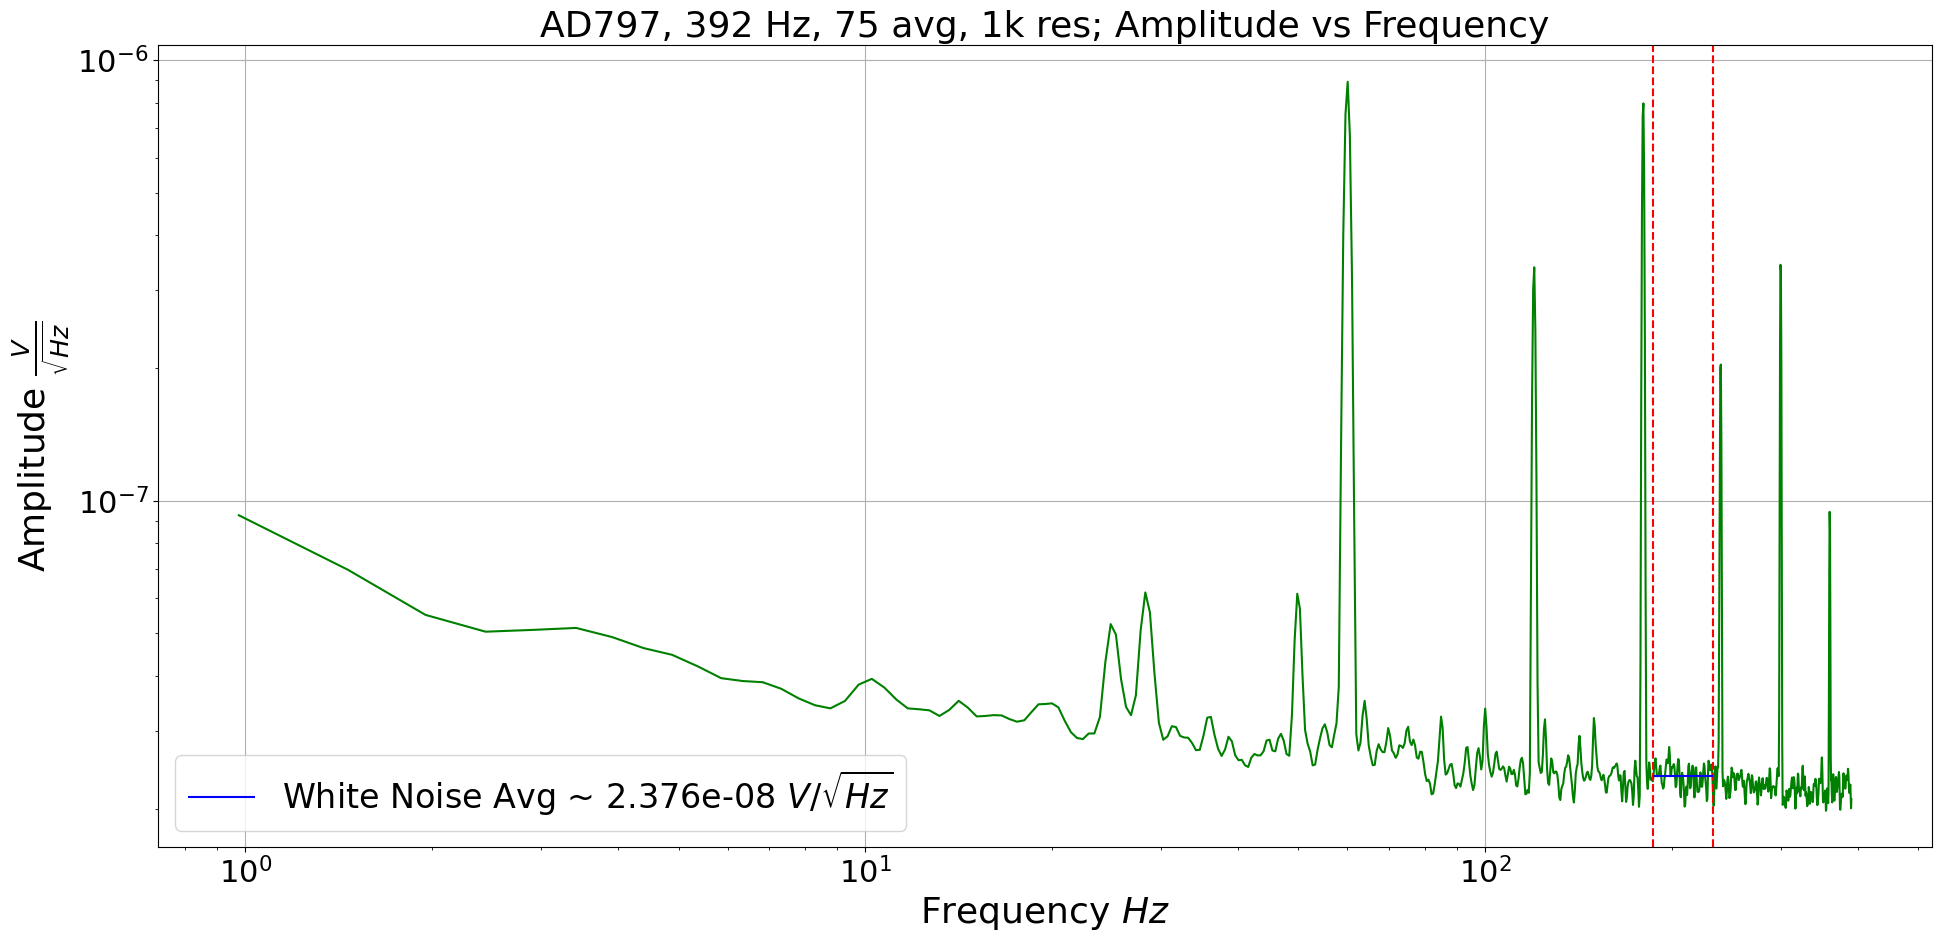

White noise average across 95 bins: 2.3759144120077747e-08


In [67]:
# skip = 0
data_header = data_headers[4] 
#title = data_header
title = f'AD797, 392 Hz, 75 avg, 1k res'

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        amp_key = f'{base_name}_amp_data'

        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            amp_data = data[amp_key]

            cut_freq_data = freq_data[skip:]
            cut_amp_data = amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 380
            white_noise_index2 = 475
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise = np.mean(cut_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'freq_data': cut_freq_data,
                'amp_data': cut_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise': white_noise
            })

plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['amp_data'], color='green')# label=f'gain')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--')#, label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--')#, label=f"f2: {white_noise_freq2}")
plt.hlines(y=white_noise, xmin=white_noise_freq1, xmax=white_noise_freq2, 
           color='blue', linestyle='-', label=f'White Noise Avg ~ {white_noise:.3e} ' r'$V/\sqrt{Hz}$')
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend(loc='lower left')

output_path = f'Plots/4d-AD797_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f'White noise average across {white_noise_index2 - white_noise_index1} bins: {white_noise}')

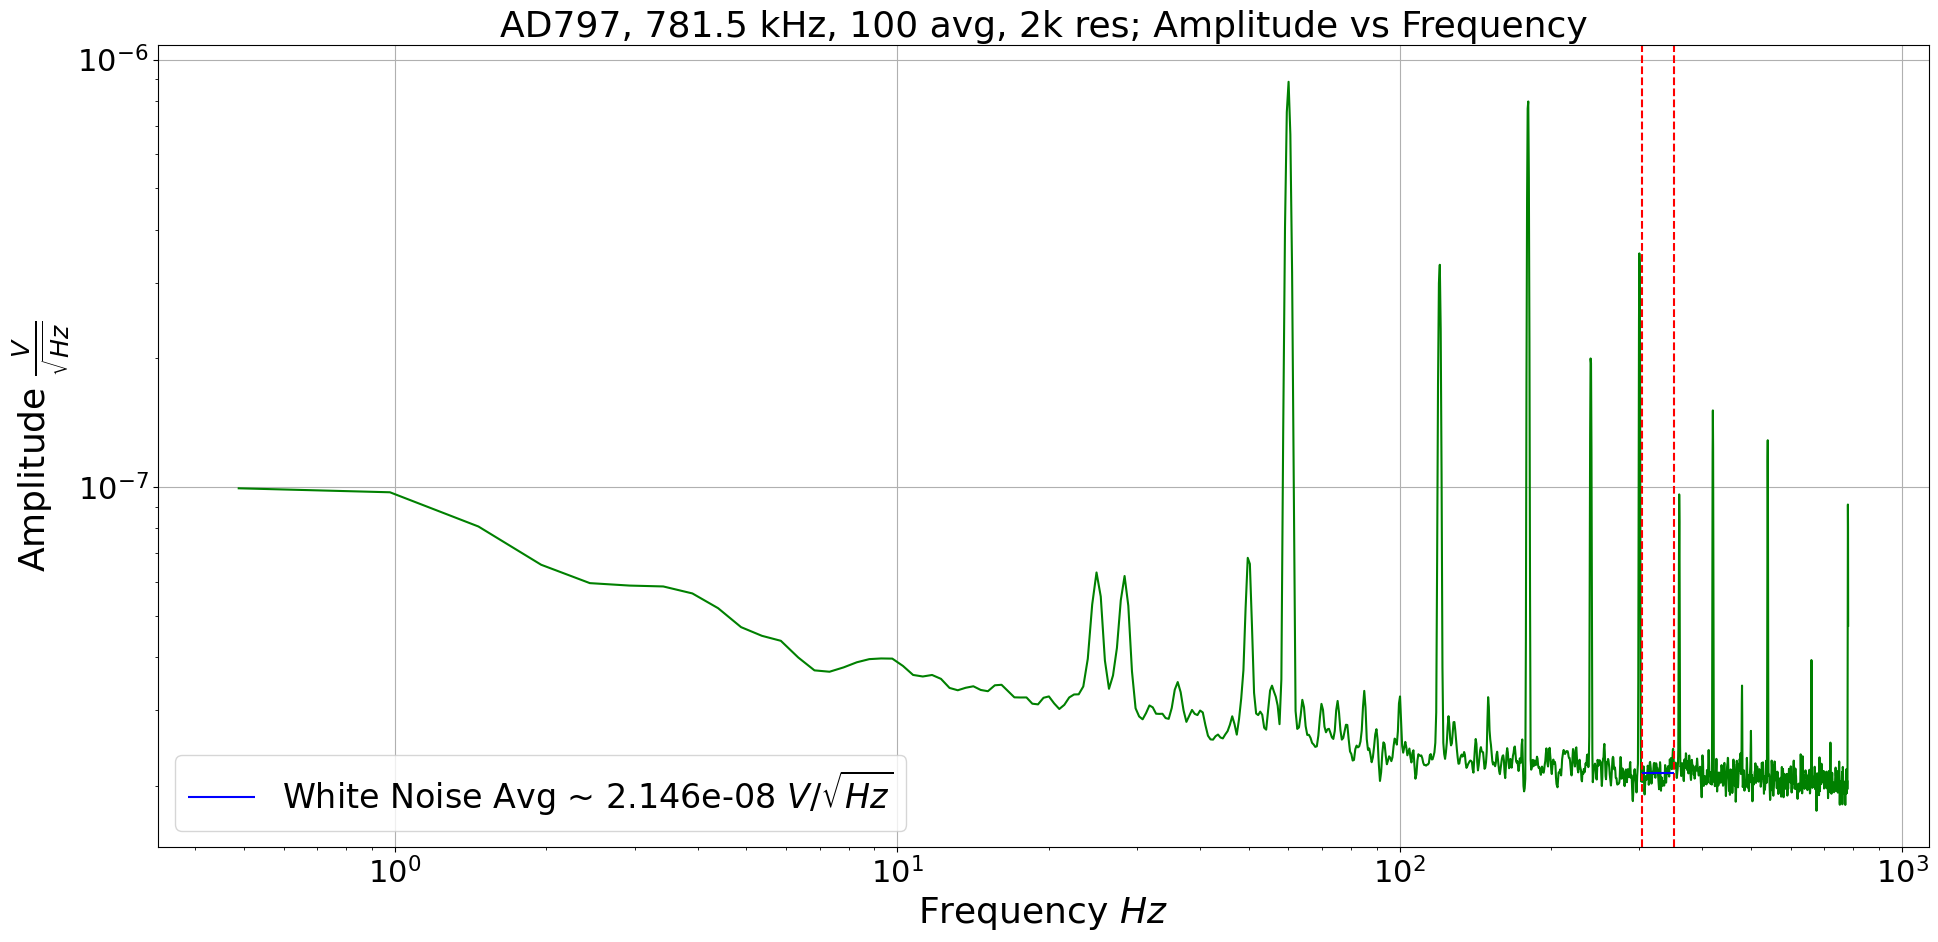

White noise average across 100 bins: 2.145559308608878e-08


In [68]:
skip = 2
data_header = data_headers[5] 
title = data_header
title = f'AD797, 781.5 kHz, 100 avg, 2k res'

entries = []

for key, value in data.items():
    if key.startswith(data_header) and key.endswith('_freq_data'):
        base_name = key[:-10]
        freq_key = f'{base_name}_freq_data'
        amp_key = f'{base_name}_amp_data'

        if freq_key in data:
            label_part = base_name[len(data_header):]
            print(label_part)
            freq_data = value
            amp_data = data[amp_key]

            cut_freq_data = freq_data[skip:]
            cut_amp_data = amp_data[skip:]

            corner_freq_index = 4
            corner_freq = cut_freq_data[corner_freq_index]

            white_noise_index1 = 620
            white_noise_index2 = 720
            white_noise_freq1 = cut_freq_data[white_noise_index1]
            white_noise_freq2 = cut_freq_data[white_noise_index2]

            white_noise = np.mean(cut_amp_data[white_noise_index1:white_noise_index2])

            entries.append({
                'label': label_part,
                'freq_data': cut_freq_data,
                'amp_data': cut_amp_data,
                'corner_freq': corner_freq,
                'white_noise_freq1': white_noise_freq1, 
                'white_noise_freq2': white_noise_freq2, 
                'white_noise': white_noise
            })

plt.figure(figsize=(20, 10))

line_handles = []

for entry in entries:
    line, = plt.plot(entry['freq_data'], entry['amp_data'], color='green')#label=f'gain')
    line_handles.append(line)

plt.axvline(white_noise_freq1, color='red', linestyle='--')#, label=f"f1: {white_noise_freq1}")
plt.axvline(white_noise_freq2, color='red', linestyle='--')#, label=f"f2: {white_noise_freq2}")
plt.hlines(y=white_noise, xmin=white_noise_freq1, xmax=white_noise_freq2, 
           color='blue', linestyle='-', label=f'White Noise Avg ~ {white_noise:.3e} ' r'$V/\sqrt{Hz}$')
plt.xlabel(r'Frequency $Hz$ ')
plt.xscale('log')
plt.ylabel(r'Amplitude $\frac{V}{\sqrt{Hz}}$')
plt.yscale('log')
plt.title(f'{title}; Amplitude vs Frequency')
plt.grid(True)
plt.legend(loc='lower left')

output_path = f'Plots/4d-AD797_plots/{title}.png'
plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f'White noise average across {white_noise_index2 - white_noise_index1} bins: {white_noise}')